<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_ML/blob/main/Lab_4_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks.

*   **Deadline: 23:59, 01/04/2024**



# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/data


In [61]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import datasets
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier

#Task 1.
Apply **LogisticRegression** to iris dataset to classify species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'.



```
from sklearn import datasets
data1 = datasets.load_iris()
```




Accuracy :  0.9733333333333334


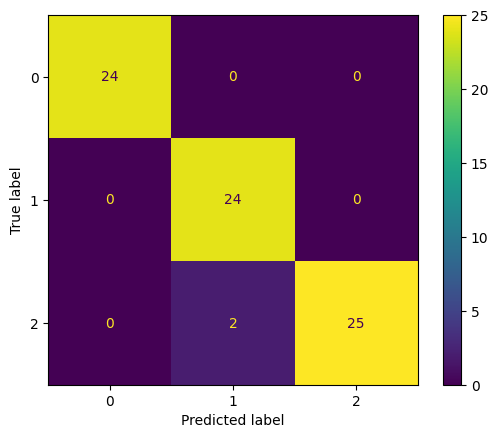

In [ ]:
# code
data1 = datasets.load_iris()
X = data1.data
y = data1.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=1)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

#Task 2.
Apply LogisticRegression to **FASHION** dataset (*fashion_train.csv* and *fashion_test.csv*) which aims at classifying 10 fashion categories. Dataset includes 784 pixels values of images (28x28). This pixel-value is an integer between 0 and 255. Each training and test example is assigned to one of the following labels:

*   0 T-shirt/top
*   1 Trouser
*   2 Pullover
*   3 Dress
*   4 Coat
*   5 Sandal
*   6 Shirt
*   7 Sneaker
*   8 Bag
*   9 Ankle boot

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  0.79


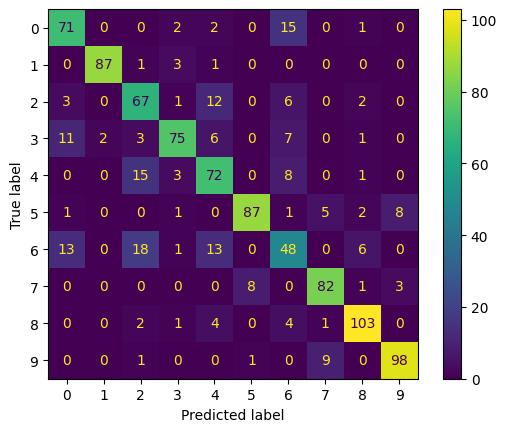

In [38]:
# code
data2 = pd.read_csv('fashion_train.csv')
data3 = pd.read_csv('fashion_test.csv')
X_train = data2.iloc[:,0:len(data2.columns)-1]
y_train = data2[['y']]
X_test = data3.iloc[:,0:len(data2.columns)-1]
y_test = data3[['y']]
lg_classifier = LogisticRegression(random_state = 1)
lg_classifier.fit(X_train, y_train)
y_pred = lg_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


#Task 3.
Apply another classification algorithm named **kNN**, which is an instance classifcation model.
*  3.1. Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: **accuracy, precision, recall, f1 measure**) using **PrettyTable**.


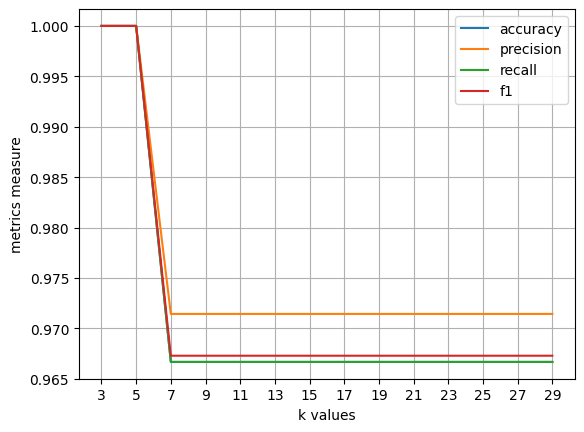

best value of k : 3
+--------------------------+--------------------+--------------------+--------------------+--------------------+
| classification algorithm |      accuracy      |     precision      |       recall       |         f1         |
+--------------------------+--------------------+--------------------+--------------------+--------------------+
|           kNN            | 0.9714285714285715 | 0.9755102040816327 | 0.9714285714285715 | 0.971956043956044  |
|   Logistic regression    | 0.9666666666666667 | 0.9714285714285714 | 0.9666666666666667 | 0.9672820512820512 |
+--------------------------+--------------------+--------------------+--------------------+--------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# code
# 3.1
data1 = datasets.load_iris()
X = data1.data
y = data1.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
kNN_accuracy_score = []
kNN_precision_score = []
kNN_recall_score = []
kNN_f1_score = []
for i in range (3,30,2):
  kNN_classifier = KNeighborsClassifier(n_neighbors=i)
  kNN_classifier.fit(X_train,y_train)
  y_pred_kNN = kNN_classifier.predict(X_test)
  kNN_accuracy_score.append(accuracy_score(y_test, y_pred_kNN))
  kNN_precision_score.append(precision_score(y_test, y_pred_kNN, average='weighted'))
  kNN_recall_score.append(recall_score(y_test, y_pred_kNN, average='weighted'))
  kNN_f1_score.append(f1_score(y_test, y_pred_kNN, average='weighted'))
k_values = [i for i in range (3,30,2)]

plt.figure(figsize=None)
plt.plot(k_values, kNN_accuracy_score, label='accuracy')
plt.plot(k_values, kNN_precision_score, label='precision')
plt.plot(k_values, kNN_recall_score, label='recall')
plt.plot(k_values, kNN_f1_score, label='f1')
plt.xlabel('k values')
plt.ylabel('metrics measure')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

best_k_value = k_values[np.argmax(kNN_accuracy_score)]
print("best value of k : {}".format(best_k_value))

3.2
lr_classifier = LogisticRegression(random_state = 1)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
lr_accuracy_score = (accuracy_score(y_test, y_pred_lr))
lr_precision_score = (precision_score(y_test, y_pred_lr, average='weighted'))
lr_recall_score = (recall_score(y_test, y_pred_lr, average='weighted'))
lr_f1_score = (f1_score(y_test, y_pred_lr, average='weighted'))

t = PrettyTable(['classification algorithm', 'accuracy', 'precision', 'recall', 'f1'])
t.add_row(['kNN', np.mean(kNN_accuracy_score), np.mean(kNN_precision_score), np.mean(kNN_recall_score), np.mean(kNN_f1_score)])
t.add_row(['Logistic regression', lr_accuracy_score, lr_precision_score, lr_recall_score, lr_f1_score])

print(t)

#Task 4.
Similar to Task 3, apply kNN algorithm to **FASHION** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.2.	Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.3.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

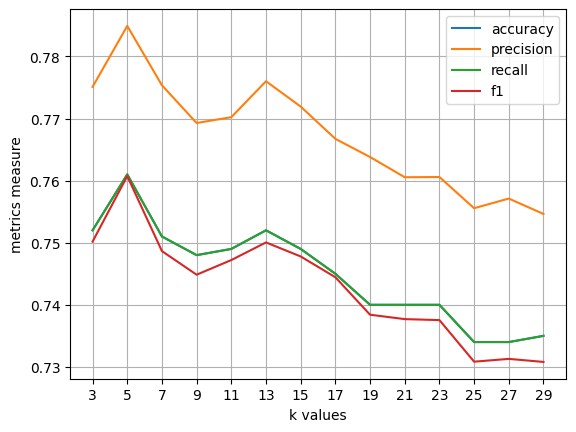

best value of k : 5


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

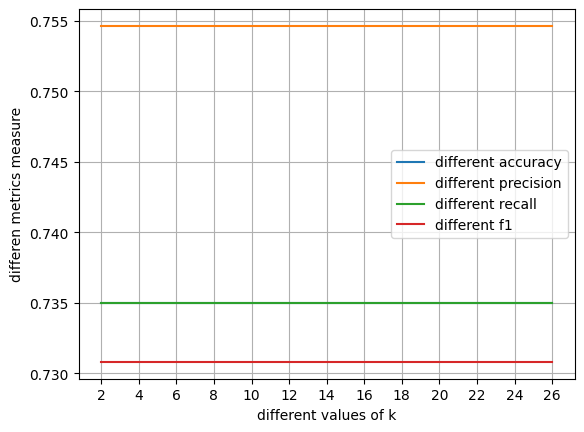

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


+--------------------------+----------+--------------------+--------+--------------------+
| classification algorithm | accuracy |     precision      | recall |         f1         |
+--------------------------+----------+--------------------+--------+--------------------+
|           kNN            |  0.745   | 0.7672675620266193 | 0.745  | 0.7428895830474804 |
|   Logistic regression    |   0.79   | 0.7947465025148702 |  0.79  | 0.7905529748954693 |
+--------------------------+----------+--------------------+--------+--------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# code
# 4.1
data2 = pd.read_csv('fashion_train.csv')
data3 = pd.read_csv('fashion_test.csv')
X_train = data2.iloc[:,0:len(data2.columns)-1]
y_train = data2[['y']]
X_test = data3.iloc[:,0:len(data2.columns)-1]
y_test = data3[['y']]
kNN_accuracy_score = []
kNN_precision_score = []
kNN_recall_score = []
kNN_f1_score = []
for i in range (3,30,2):
  kNN_classifier = KNeighborsClassifier(n_neighbors=i)
  kNN_classifier.fit(X_train,y_train)
  y_pred_kNN = kNN_classifier.predict(X_test)
  kNN_accuracy_score.append(accuracy_score(y_test, y_pred_kNN))
  kNN_precision_score.append(precision_score(y_test, y_pred_kNN, average='weighted'))
  kNN_recall_score.append(recall_score(y_test, y_pred_kNN, average='weighted'))
  kNN_f1_score.append(f1_score(y_test, y_pred_kNN, average='weighted'))
k_values = [i for i in range (3,30,2)]

plt.figure(figsize=None)
plt.plot(k_values, kNN_accuracy_score, label='accuracy')
plt.plot(k_values, kNN_precision_score, label='precision')
plt.plot(k_values, kNN_recall_score, label='recall')
plt.plot(k_values, kNN_f1_score, label='f1')
plt.xlabel('k values')
plt.ylabel('metrics measure')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

best_k_value = k_values[np.argmax(kNN_accuracy_score)]
print("best value of k : {}".format(best_k_value))

# 4.2
different_kNN_accuracy_score = []
different_kNN_precision_score = []
different_kNN_recall_score = []
different_kNN_f1_score = []

for i in range (2,28,2):
  different_kNN_classifier = KNeighborsClassifier(n_neighbors=i)
  different_kNN_classifier.fit(X_train,y_train)
  different_y_pred_kNN = kNN_classifier.predict(X_test)
  different_kNN_accuracy_score.append(accuracy_score(y_test, y_pred_kNN))
  different_kNN_precision_score.append(precision_score(y_test, y_pred_kNN, average='weighted'))
  different_kNN_recall_score.append(recall_score(y_test, y_pred_kNN, average='weighted'))
  different_kNN_f1_score.append(f1_score(y_test, y_pred_kNN, average='weighted'))
different_k_values = [i for i in range (2,28,2)]

plt.figure(figsize=None)
plt.plot(different_k_values, different_kNN_accuracy_score, label='different accuracy')
plt.plot(different_k_values, different_kNN_precision_score, label='different precision')
plt.plot(different_k_values, different_kNN_recall_score, label='different recall')
plt.plot(different_k_values, different_kNN_f1_score, label='different f1')
plt.xlabel('different values of k')
plt.ylabel('differen metrics measure')
plt.xticks(different_k_values)
plt.legend()
plt.grid(True)
plt.show()

# 4.3
lr_classifier = LogisticRegression(random_state = 1)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
lr_accuracy_score = (accuracy_score(y_test, y_pred_lr))
lr_precision_score = (precision_score(y_test, y_pred_lr, average='weighted'))
lr_recall_score = (recall_score(y_test, y_pred_lr, average='weighted'))
lr_f1_score = (f1_score(y_test, y_pred_lr, average='weighted'))

t = PrettyTable(['classification algorithm', 'accuracy', 'precision', 'recall', 'f1'])
t.add_row(['kNN', np.mean(kNN_accuracy_score), np.mean(kNN_precision_score), np.mean(kNN_recall_score), np.mean(kNN_f1_score)])
t.add_row(['Logistic regression', lr_accuracy_score, lr_precision_score, lr_recall_score, lr_f1_score])

print(t)

#Task 5.
Compare the performance of selected classification algorithms (**Decision Tree, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered **spam (1) or not (0)**, i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:
*  **48 continuous real [0,100] attributes** of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  **6 continuous real [0,100] attributes** of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  **1 continuous real [1,...] attribute** of type capital_run_length_average
= average length of uninterrupted sequences of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  **1 nominal {0,1} class attribute** of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [64]:
# code
data4 = pd.read_csv('spambase.csv')
X = data4.drop(columns='class')
y = data4[['class']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

# Logistic Regression
lr_classifier = LogisticRegression(random_state = 1)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
lr_accuracy_score = (accuracy_score(y_test, y_pred_lr))
lr_precision_score = (precision_score(y_test, y_pred_lr, average='weighted'))
lr_recall_score = (recall_score(y_test, y_pred_lr, average='weighted'))
lr_f1_score = (f1_score(y_test, y_pred_lr, average='weighted'))

# kNN
kNN_accuracy_score = []
kNN_precision_score = []
kNN_recall_score = []
kNN_f1_score = []
for i in range (3,30,2):
  kNN_classifier = KNeighborsClassifier(n_neighbors=i)
  kNN_classifier.fit(X_train,y_train)
  y_pred_kNN = kNN_classifier.predict(X_test)
  kNN_accuracy_score.append(accuracy_score(y_test, y_pred_kNN))
  kNN_precision_score.append(precision_score(y_test, y_pred_kNN, average='weighted'))
  kNN_recall_score.append(recall_score(y_test, y_pred_kNN, average='weighted'))
  kNN_f1_score.append(f1_score(y_test, y_pred_kNN, average='weighted'))


# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
dt_accuracy_score = (accuracy_score(y_test, y_pred_dt))
dt_precision_score = (precision_score(y_test, y_pred_dt, average='weighted'))
dt_recall_score = (recall_score(y_test, y_pred_dt, average='weighted'))
dt_f1_score = (f1_score(y_test, y_pred_dt, average='weighted'))

t = PrettyTable(['classification algorithm', 'accuracy', 'precision', 'recall', 'f1'])
t.add_row(['Logistic regression', lr_accuracy_score, lr_precision_score, lr_recall_score, lr_f1_score])
t.add_row(['kNN', np.mean(kNN_accuracy_score), np.mean(kNN_precision_score), np.mean(kNN_recall_score), np.mean(kNN_f1_score)])
t.add_row(['Decision Tree', dt_accuracy_score, dt_precision_score, dt_recall_score, dt_f1_score])

print(t)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

+--------------------------+--------------------+--------------------+--------------------+--------------------+
| classification algorithm |      accuracy      |     precision      |       recall       |         f1         |
+--------------------------+--------------------+--------------------+--------------------+--------------------+
|   Logistic regression    | 0.9239956568946797 | 0.9242787293043226 | 0.9239956568946797 | 0.9234655541393255 |
|           kNN            | 0.7809058476810921 | 0.7799171205858484 | 0.7809058476810921 | 0.7802479639114172 |
|      Decision Tree       | 0.9087947882736156 | 0.9092958269143909 | 0.9087947882736156 | 0.908974347406318  |
+--------------------------+--------------------+--------------------+--------------------+--------------------+


In [ ]:
from prettytable import PrettyTable

# These 3 are the columns of the tables
t = PrettyTable(['Subject Code', 'Subject', 'Marks'])

# To insert rows:
t.add_row(['K01', 'Maths', 95])
t.add_row(['K04', 'Physics', 89])
t.add_row(['K03', 'Chemistry', 92])
t.add_row(['K08', 'English', 91])
t.add_row(['K29', 'Computer Science', 99])
t.add_row(['K06', 'Social Science', 86])

print(t)

+--------------+------------------+-------+
| Subject Code |     Subject      | Marks |
+--------------+------------------+-------+
|     K01      |      Maths       |   95  |
|     K04      |     Physics      |   89  |
|     K03      |    Chemistry     |   92  |
|     K08      |     English      |   91  |
|     K29      | Computer Science |   99  |
|     K06      |  Social Science  |   86  |
+--------------+------------------+-------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.